In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("../results/benchmarks/clustering_benchmarks.csv")

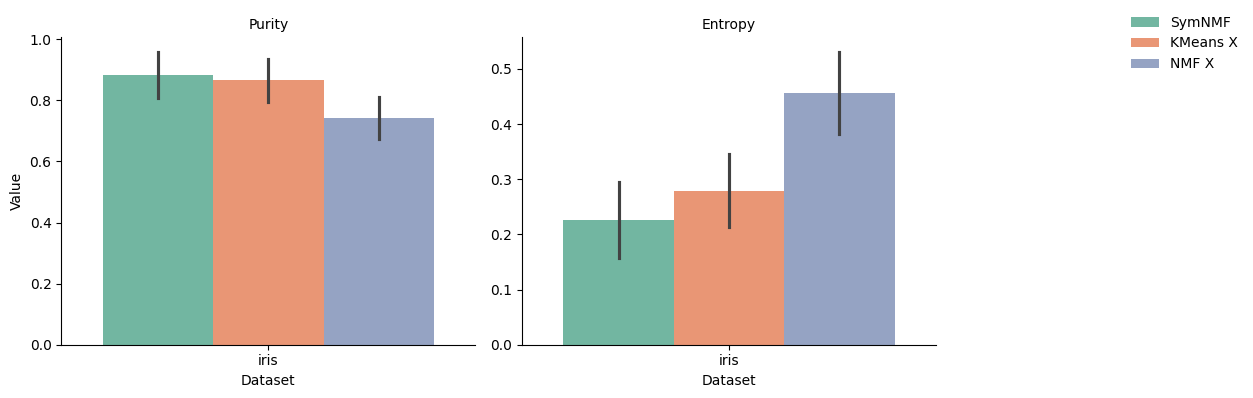

In [13]:
# remove dataset haxby-faces if it exists
df = df[df["Dataset"] != "haxby-faces"]
df = df[df["Dataset"] != "diabetes"]


df = df.drop(columns=["Accuracy"])

df["Model"] = df["Model"].replace("SymNMF TriFactor", "SymNMF")


# remove haxby from the dataframe
# df = df[df["Dataset"] != "haxby-faces"]


# Melt the dataframe to have a long-form dataframe suitable for facetgrid
df_melted = df.melt(
    id_vars=["Dataset", "Model", "Seed"],
    # value_vars=["Purity", "Entropy", "Sparseness"],
    value_vars=["Purity", "Entropy"],
    var_name="Metric",
    value_name="Value",
)


df.groupby(["Dataset", "Model"]).agg({"Purity": ["mean", "std", "max", "min"]})

# Create a FacetGrid for the different metrics
g = sns.FacetGrid(
    df_melted,
    col="Metric",
    sharey=False,
    height=4,
    aspect=1.2,
    col_wrap=2,
    sharex=False,
)
g.map_dataframe(
    sns.barplot, x="Dataset", y="Value", hue="Model", errorbar="sd", palette="Set2"
)

# Adjust the legend and labels
# g.add_legend(bbox_to_anchor=(1.05, 1), loc="upper lefxt")
g.add_legend(bbox_to_anchor=(1.05, 1), loc="upper left")
g.set_axis_labels("Dataset", "Value")
g.set_titles(col_template="{col_name}")

plt.show()
plt.close()